In [1]:
### Basic Imports
import os
import pandas as pd
import numpy as np
from itertools import combinations

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

### Importing text processing packages
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize
from valuable_features import *

### Importing the relevant ML libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,f1_score,precision_score,classification_report,confusion_matrix,auc
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample

# Creating features for comment (if necessary)

## Read in training and validation data first

In [2]:
path_parent = os.path.dirname(os.path.dirname(os.getcwd()))
training_data_path = f'{path_parent}/Data/Thoughtful Comments/thoughtful_comments_labelled.csv'
validation_data_path = f'{path_parent}/Data/Thoughtful Comments/validation_comments.csv'

## Create features
### Function for creating features in valuable_features.py

In [3]:
training_features_created = create_features(training_data_path)
training_features_created.to_csv(f'{path_parent}/Data/Thoughtful Comments/thoughtful_comments_final.csv')

validation_features_created = create_features(validation_data_path)
validation_features_created.to_csv(f'{path_parent}/Data/Thoughtful Comments/validation_comments_final.csv')

/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data Preparation/Valuable_Comments/valuable_features.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments[i]['Relevance score'] = relavance_scores
/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data Preparation/Valuable_Comments/valuable_features.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments[i]['Relevance score'] = relavance_scores


# Reading training and validation data after features creation for EDA and modelling

In [4]:
path_parent = os.path.dirname(os.path.dirname(os.getcwd()))
training_df = pd.read_csv(f'{path_parent}/Data/Thoughtful Comments/thoughtful_comments_final.csv')
training_df.drop(['Unnamed: 0'], axis=1, inplace=True)
validation_df = pd.read_csv(f'{path_parent}/Data/Thoughtful Comments/validation_comments_final.csv')
validation_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# EDA

In [5]:
training_df.describe()

,Label1,Label2,Label3,Thoughtful?,Length,Length Category,Average Loglikelihood,Num Verbs,Num Discourse Relations,Num Pronouns,Relevance score,Relevance Score Category
count,3963.000000,3963.000000,3961.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,0.069897,0.080747,0.090381,0.069392,32.098915,1.356548,-12.718031,5.949029,1.165026,0.958617,15.935466,1.287661
std,0.255005,0.272480,0.286763,0.254151,47.502223,1.077183,2.389991,9.426563,2.094564,1.703340,35.004717,1.248731
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-23.822927,0.000000,0.000000,0.000000,-0.666377,0.000000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-13.848168,2.000000,0.000000,0.000000,3.777055,0.000000
50%,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,-12.124753,4.000000,1.000000,0.000000,7.287618,1.000000
75%,0.000000,0.000000,0.000000,0.000000,37.000000,2.000000,-10.997740,7.000000,2.000000,1.000000,15.463359,2.000000
max,1.000000,1.000000,1.000000,1.000000,983.000000,4.000000,-7.103919,191.000000,41.000000,33.000000,408.447008,4.000000


In [6]:
training_df[['Length Category']].value_counts()
training_df[['Relevance Score Category']].value_counts()

Relevance Score Category
0                           1363
1                           1106
2                            796
3                            387
4                            311
dtype: int64

In [7]:
training_df[['Thoughtful?']].value_counts()

Thoughtful?
0              3688
1               275
dtype: int64

## Plotting boxplots for all features to see if there is significant difference between valuable/not valuable comments

### Feature 1 (Length)

Text(0.5, 1.0, 'Boxplot of Length (with outliers)')

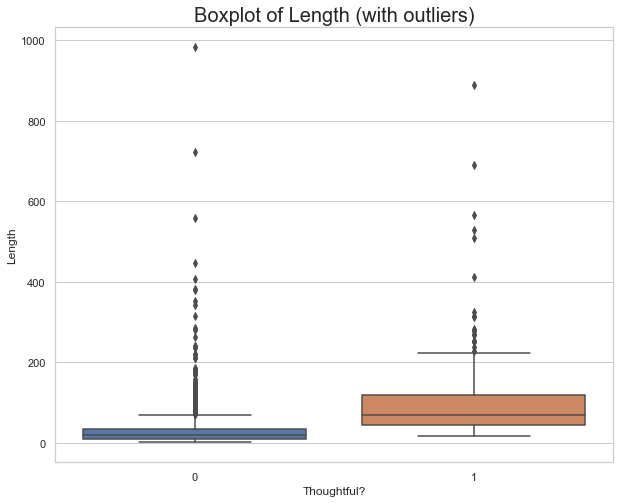

In [8]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Length', x='Thoughtful?', ax=ax).set_title('Boxplot of Length (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Length (without outliers)')

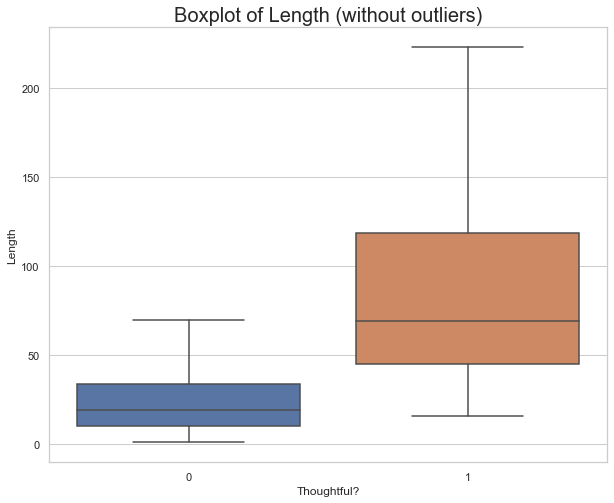

In [9]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Length', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Length (without outliers)', fontsize=20)

### Feature 2 (Comment Likelihood)

Text(0.5, 1.0, 'Boxplot of Comment Likelihood (with outliers)')

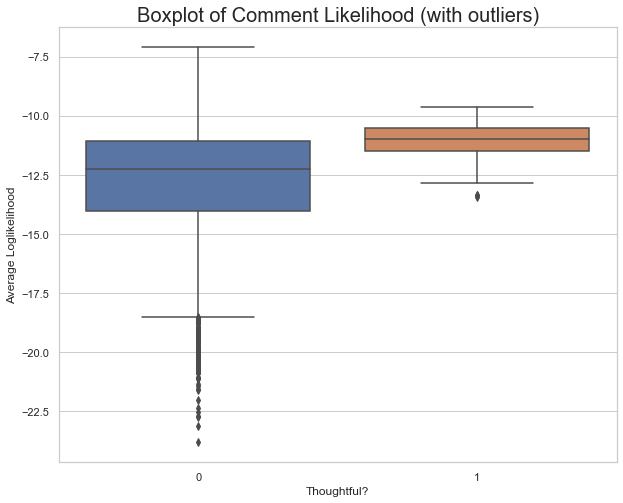

In [10]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Average Loglikelihood', x='Thoughtful?', ax=ax).set_title('Boxplot of Comment Likelihood (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Comment Likelihood (without outliers)')

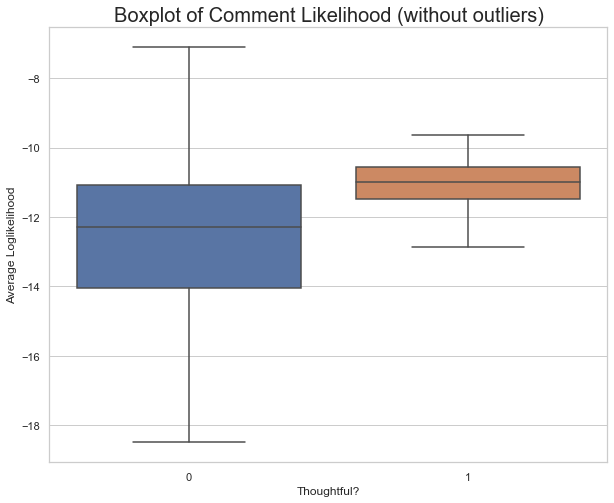

In [11]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Average Loglikelihood', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Comment Likelihood (without outliers)', fontsize=20)

### Feature 3 (Num Verbs)

Text(0.5, 1.0, 'Boxplot of Number of Verbs (with outliers)')

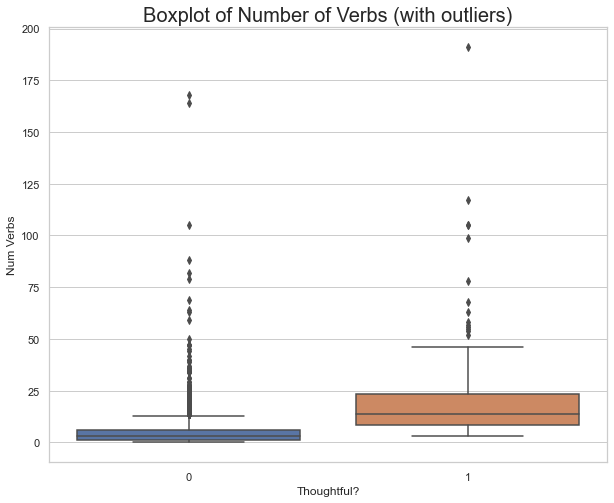

In [12]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Verbs', x='Thoughtful?', ax=ax).set_title('Boxplot of Number of Verbs (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Number of Verbs (without outliers)')

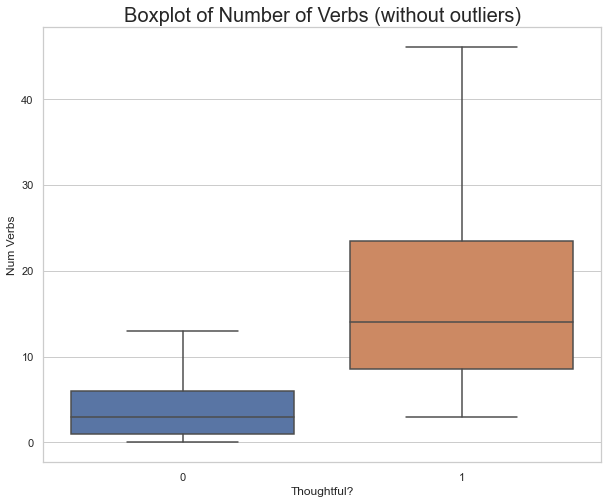

In [13]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Verbs', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Number of Verbs (without outliers)', fontsize=20)

### Feature 4 (Num Discourse Relations)

Text(0.5, 1.0, 'Boxplot of Number of Discourse Relations (with outliers)')

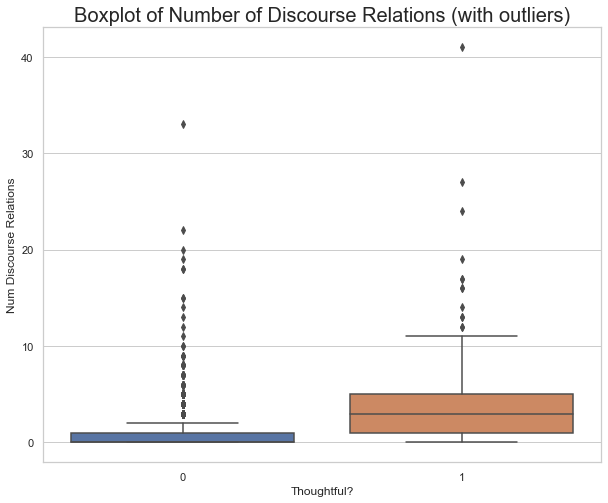

In [14]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Discourse Relations', x='Thoughtful?', ax=ax).set_title('Boxplot of Number of Discourse Relations (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Number of Discourse Relations (without outliers)')

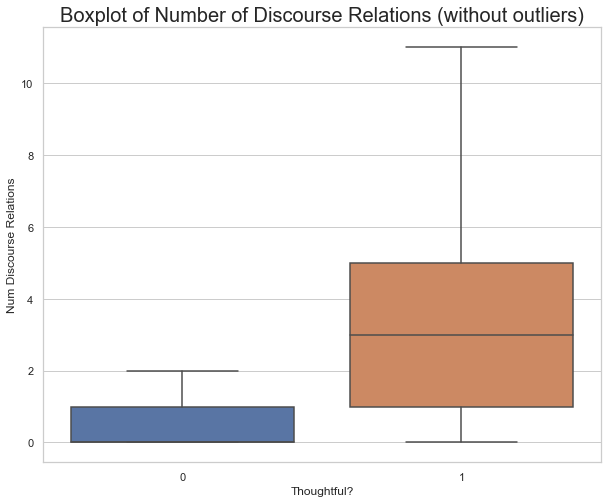

In [15]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Discourse Relations', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Number of Discourse Relations (without outliers)', fontsize=20)

### Feature 5 (Relevance Score)

Text(0.5, 1.0, 'Boxplot of Relevance Score (with outliers)')

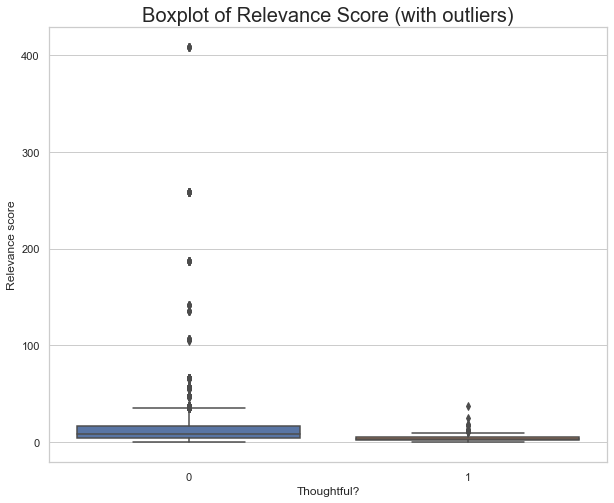

In [16]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Relevance score', x='Thoughtful?', ax=ax).set_title('Boxplot of Relevance Score (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Relevance Score (without outliers)')

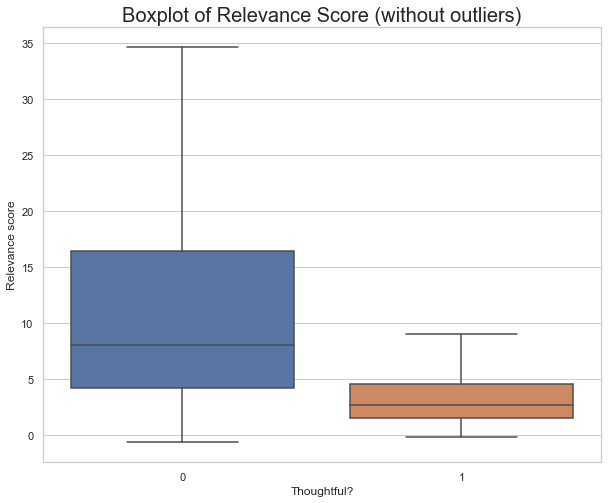

In [17]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Relevance score', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Relevance Score (without outliers)', fontsize=20)

### Feature 6 (Num Pronouns)

Text(0.5, 1.0, 'Boxplot of Num Pronouns (with outliers)')

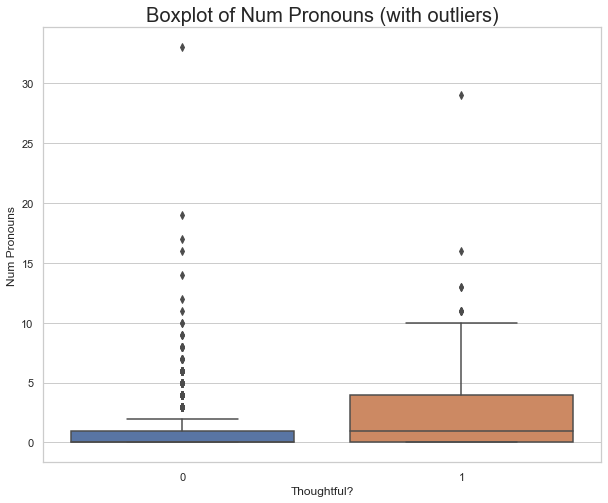

In [18]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Pronouns', x='Thoughtful?', ax=ax).set_title('Boxplot of Num Pronouns (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Num Pronouns (without outliers)')

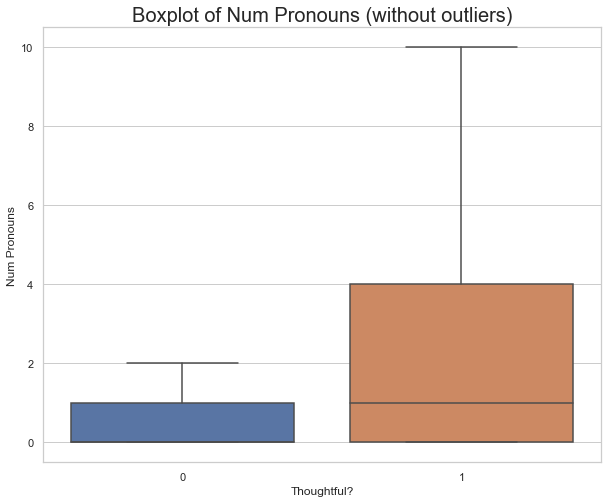

In [19]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Pronouns', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Num Pronouns (without outliers)', fontsize=20)

## Looking at distributions of independent variables

In [20]:
features_list = ['Length', 'Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Relevance Score Category', 'Num Pronouns']
target = 'Thoughtful?'

# Function to plot distribution graphs
def eda_plots(df,features_list,plot_title,fig_size):

    df[features_list].hist(bins=40,edgecolor='b',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid= False,figsize=fig_size ,color='red')

    plt.tight_layout(rect=(0,0,1.2,1.2))

    # Overall title for all the plots
    plt.suptitle(plot_title,x=0.65,y=1.25,fontsize=14)

    plt.show()

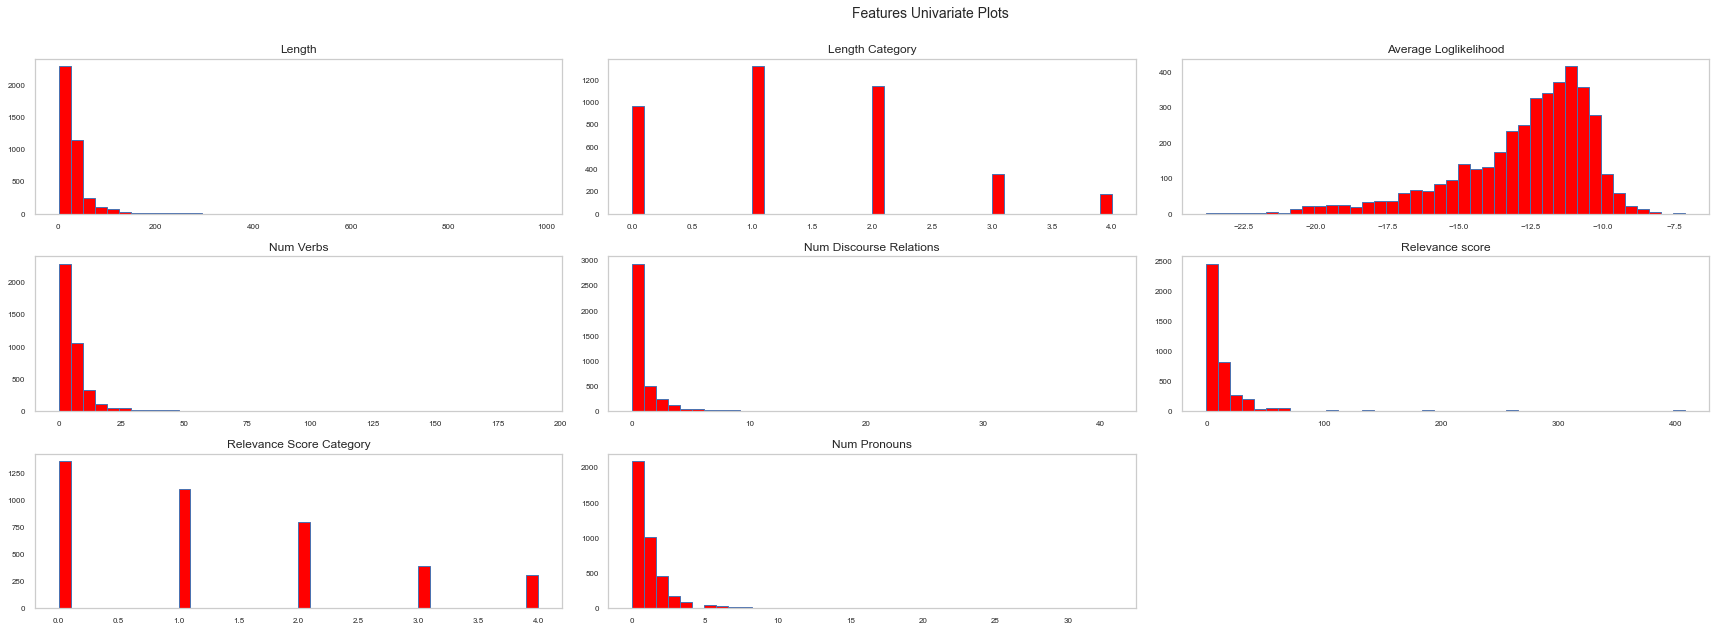

In [21]:
eda_plots(training_df,features_list,'Features Univariate Plots',(20,7))

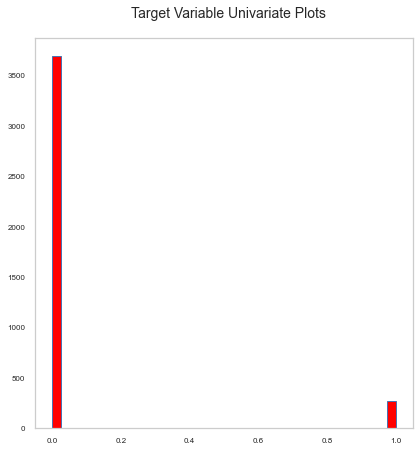

In [22]:
eda_plots(training_df,target,'Target Variable Univariate Plots',(5,5))

# Standardizing independent variables

In [23]:
scaler = StandardScaler()

training_X_scaled = training_df[features_list]
# training_X_scaled = scaler.fit_transform(training_df[features_list])
# training_X_scaled = pd.DataFrame(training_X_scaled, columns=features_list)

validation_X_scaled = validation_df[features_list]
# validation_X_scaled = scaler.fit_transform(validation_df[features_list])
# validation_X_scaled = pd.DataFrame(validation_X_scaled, columns=features_list)

# Feature importance (using RandomForestClassifier)

In [24]:
X = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y = training_df['Thoughtful?']
feat_labels = ['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [25]:
sel_rfc = SelectFromModel(RandomForestClassifier(n_estimators = 500, random_state=10))
sel_rfc.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=10))

In [26]:
selected_feat= X_train.columns[(sel_rfc.get_support())]
selected_feat

Index(['Length', 'Average Loglikelihood', 'Num Verbs', 'Relevance score'], dtype='object')

In [27]:
clf = RandomForestClassifier(n_estimators=500, random_state=10)
clf.fit(X_train, y_train)

for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Length', 0.22654862017515656)
('Average Loglikelihood', 0.21269933213941755)
('Num Verbs', 0.17595054354917283)
('Num Discourse Relations', 0.09828383883173185)
('Relevance score', 0.21451285000287731)
('Num Pronouns', 0.0720048153016439)


# Modelling

## Creating a dictionary for all the classification models

In [28]:
models_dict = {
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    # 'Decision Trees':DecisionTreeClassifier(),
    'SVM linear': svm.SVC(kernel='linear', probability=True),
    'SVM rbf': svm.SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators = 500, random_state=10),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False)
}

## Train test split on training data

In [32]:
def get_features_combi(features, n):
    comb = []
    for i in range(3, n+1):
        temp = list(combinations(features, i))
        comb += temp
    return comb
comb = get_features_combi(['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns'], 6)

best_model = {
    'features': [], 
    'model': None, 
    'accuracy': 0,
    'precision': 0,
    'recall': 0,
    'f1': 0 
}

for combi in comb:
    X = training_X_scaled[list(combi)]
    y = training_df['Thoughtful?']

    # Creating our independent and dependent variables df
    # X = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
    # y = training_df['Thoughtful?']

    # Perform train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15) 

    # Training with differnent models
    for model_name in models_dict:
        m = models_dict[model_name]
        
        m.fit(X_train, y_train)
        predictions = m.predict(X_test)

        acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels
        precision = precision_score(y_test,predictions) 
        recall = recall_score(y_test,predictions) 
        f1 = f1_score(y_test,predictions)

        if f1 > best_model['f1']:
            best_model['features'] = combi
            best_model['model'] = model_name
            best_model['acc'] = acc
            best_model['prec'] = precision
            best_model['recall'] = recall
            best_model['f1'] = f1

        # print(model_name)
        # print('-'*50)
        # print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
        # print('Precision Score for {} is {:.5f}'.format(model_name,precision))
        # print('Recall Score for {} is {:.5f}'.format(model_name,recall))
        # print('F1 Score for {} is {:.5f}'.format(model_name,f1))
        # print()
best_model

l this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[11:30:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[11:30:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/Library/Frameworks/Python.framewor

{'features': ('Average Loglikelihood',
  'Num Verbs',
  'Num Discourse Relations',
  'Relevance score'),
 'model': 'Naive Bayes',
 'accuracy': 0,
 'precision': 0,
 'recall': 0.550561797752809,
 'f1': 0.532608695652174,
 'acc': 0.9276703111858705,
 'prec': 0.5157894736842106}

## Stratified K-fold Cross Validation

In [68]:
skf = StratifiedKFold(n_splits=10)
target = training_df['Thoughtful?']

In [73]:
X = ['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']
y = ['Thoughtful?']

model = GaussianNB() # can change the model here

fold_no = 1
for train_index, test_index in skf.split(training_df, target):
    train = training_df.loc[train_index,:]
    test = training_df.loc[test_index,:]
    print('Fold', str(fold_no), 'Class Ratio:', sum(test['Thoughtful?'])/len(test['Thoughtful?']))
    
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_test)
    print('Fold', str(fold_no), 'F1 score:', f1_score(y_test,predictions))
    print()

    fold_no += 1

Fold 1 Class Ratio: 0.07052896725440806
Fold 1 F1 score: 0.39215686274509803

Fold 2 Class Ratio: 0.07052896725440806
Fold 2 F1 score: 0.3829787234042553

Fold 3 Class Ratio: 0.07052896725440806
Fold 3 F1 score: 0.360655737704918

Fold 4 Class Ratio: 0.06818181818181818
Fold 4 F1 score: 0.37974683544303794

Fold 5 Class Ratio: 0.06818181818181818
Fold 5 F1 score: 0.6428571428571429

Fold 6 Class Ratio: 0.06818181818181818
Fold 6 F1 score: 0.7450980392156864

Fold 7 Class Ratio: 0.06818181818181818
Fold 7 F1 score: 0.5230769230769231

Fold 8 Class Ratio: 0.06818181818181818
Fold 8 F1 score: 0.23684210526315788

Fold 9 Class Ratio: 0.0707070707070707
Fold 9 F1 score: 0.34782608695652173

Fold 10 Class Ratio: 0.0707070707070707
Fold 10 F1 score: 0.3846153846153846



In [74]:
X = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y = training_df[['Thoughtful?']]

for model_name in models_dict:
    m = models_dict[model_name]
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(m, X.values, y.values.ravel(), scoring=scoring, cv=10)

    print(model_name)
    print('-'*50)
    print(f"Mean accuracy is {scores['test_accuracy'].mean()}")
    print(f"Mean precision is {scores['test_precision'].mean()}")
    print(f"Mean recall is {scores['test_recall'].mean()}")
    print(f"Mean f1 is {scores['test_f1'].mean()}")
    print()
    print()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Logistic Regression
--------------------------------------------------
Mean accuracy is 0.9336367452866193
Mean precision is 0.6642490842490842
Mean recall is 0.13148148148148148
Mean f1 is 0.20201540084585648


Naive Bayes
--------------------------------------------------
Mean accuracy is 0.9162245884538075
Mean precision is 0.4434771014407418
Mean recall is 0.4603174603174603
Mean f1 is 0.4395853841282126


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to contro

## Test against validation data with the best model after stratified k-fold cross validation

In [75]:
# Creating our independent and dependent variables df
X_train = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_train = training_df[['Thoughtful?']]
X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_test = validation_df[['Thoughtful?']]

# Training with differnent models
for model_name in models_dict:
    m = models_dict[model_name]

    # X_train = training_data[X]
    # y_train = training_data[y]
    # X_test = validation_data[X]
    # y_test = validation_data[y]
    
    m.fit(X_train, y_train.values.ravel())
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
    precision = precision_score(y_test,predictions) 
    recall = recall_score(y_test,predictions) 
    f1 = f1_score(y_test,predictions)

    print(model_name)
    print('-'*50)
    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
    print('Precision Score for {} is {:.5f}'.format(model_name,precision))
    print('Recall Score for {} is {:.5f}'.format(model_name,recall))
    print('F1 Score for {} is {:.5f}'.format(model_name,f1))
    print()

Logistic Regression
--------------------------------------------------
Accuracy Score for Logistic Regression is 0.94307
Precision Score for Logistic Regression is 0.59459
Recall Score for Logistic Regression is 0.23913
F1 Score for Logistic Regression is 0.34109

Naive Bayes
--------------------------------------------------
Accuracy Score for Naive Bayes is 0.90757
Precision Score for Naive Bayes is 0.33333
Recall Score for Naive Bayes is 0.50000
F1 Score for Naive Bayes is 0.40000

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
SVM linear
--------------------------------------------------
Accuracy Score for SVM linear is 0.93838
Precision Score for SVM linear is 0.00000
Recall Score for SVM linear is 0.000

### ROC score

In [78]:
model = GaussianNB() #change this based on the best model performance
model.fit(X_train, y_train.values.ravel()) 
prob = model.predict_proba(X_test)
prob = [p[1] for p in prob]
print(roc_auc_score(y_test, prob))

0.8850937218756789


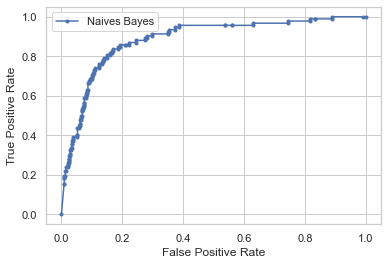

In [80]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naives Bayes') #change the label to the model with the best performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Perform upsampling method and model again

In [115]:
training_thoughtful = training_df[training_df['Thoughtful?'] == 1]
training_unthoughtful = training_df[training_df['Thoughtful?'] == 0]

# scaler = StandardScaler()
# features_list = ['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']

# training_thoughtful_X_scaled = scaler.fit_transform(training_thoughtful[features_list])
# training_thoughtful_X_scaled = pd.DataFrame(training_thoughtful_X_scaled, columns=features_list)
# training_unthoughtful_X_scaled = scaler.fit_transform(training_unthoughtful[features_list])
# training_unthoughtful_X_scaled = pd.DataFrame(training_unthoughtful_X_scaled, columns=features_list)

# training_thoughtful_X_scaled['Thoughtful?'] = training_thoughtful['Thoughtful?']
# training_unthoughtful_X_scaled['Thoughtful?'] = training_unthoughtful['Thoughtful?']

# print(len(training_thoughtful_X_scaled))
# print(len(training_unthoughtful_X_scaled))

In [116]:
training_thoughtful_upsampled = resample(training_thoughtful, replace=True, n_samples=2500, random_state=170)
training_upsampled = pd.concat([training_unthoughtful, training_thoughtful_upsampled])

In [117]:
training_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6188 entries, 0 to 2097
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comment                   6188 non-null   object 
 1   Topic                     6188 non-null   object 
 2   Label1                    6188 non-null   int64  
 3   Label2                    6188 non-null   int64  
 4   Label3                    6186 non-null   float64
 5   Thoughtful?               6188 non-null   int64  
 6   Length                    6188 non-null   int64  
 7   Length Category           6188 non-null   int64  
 8   Average Loglikelihood     6188 non-null   float64
 9   Num Verbs                 6188 non-null   int64  
 10  Num Discourse Relations   6188 non-null   int64  
 11  Num Pronouns              6188 non-null   int64  
 12  Relevance score           6188 non-null   float64
 13  Relevance Score Category  6188 non-null   int64  
dtypes: float

In [118]:
X_train = training_upsampled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_train = training_upsampled[['Thoughtful?']]
X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_test = validation_df[['Thoughtful?']]

### Testing on validation data after upsampling

In [120]:
# Creating our independent and dependent variables df
# X_train = training_upsampled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
X_train = training_upsampled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score']]
y_train = training_upsampled[['Thoughtful?']]
# X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score']]
y_test = validation_df[['Thoughtful?']]

# Training with differnent models
for model_name in models_dict:
    m = models_dict[model_name]

    # X_train = training_data[X]
    # y_train = training_data[y]
    # X_test = validation_data[X]
    # y_test = validation_data[y]
    
    m.fit(X_train, y_train.values.ravel())
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
    precision = precision_score(y_test,predictions) 
    recall = recall_score(y_test,predictions) 
    f1 = f1_score(y_test,predictions)

    print(model_name)
    print('-'*50)
    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
    print('Precision Score for {} is {:.5f}'.format(model_name,precision))
    print('Recall Score for {} is {:.5f}'.format(model_name,recall))
    print('F1 Score for {} is {:.5f}'.format(model_name,f1))
    print()

Logistic Regression
--------------------------------------------------
Accuracy Score for Logistic Regression is 0.06162
Precision Score for Logistic Regression is 0.06162
Recall Score for Logistic Regression is 1.00000
F1 Score for Logistic Regression is 0.11609

Naive Bayes
--------------------------------------------------
Accuracy Score for Naive Bayes is 0.93838
Precision Score for Naive Bayes is 0.00000
Recall Score for Naive Bayes is 0.00000
F1 Score for Naive Bayes is 0.00000

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
SVM linear
--------------------------------------------------
Accuracy Score for SVM linear is 0.06162
Precision Score for SVM linear is 0.06162
Recall Score for SVM linear is 1.000

In [ ]:
def get_features_combi(features, n):
    combi = []
    for i in range(3, n+1):
        temp = list(combinations(features, i))
        combi += temp
    return combi

# comb = get_features_combi(['Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance Score Category'], 5)
combi = get_features_combi(['Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns'], 6)

## Test with all possible features combination to find the best model (on validation data)

In [ ]:
scores = {
    'features': None, 
    'model': None,
    'acc': 0, 
    'prec': 0,
    'rec': 0,
    'f1': 0
}

for features in comb:
    # Creating our independent and dependent variables df
    X = list(features)
    y = ['Thoughtful?']

    # Training with differnent models
    for model_name in models_dict:
        m = models_dict[model_name]

        X_train = training_upsampled[X]
        y_train = training_upsampled[y]
        X_test = validation_X_scaled[X]
        y_test = validation_df[y]
        
        m.fit(X_train, y_train.values.ravel())
        predictions = m.predict(X_test)

        acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
        precision = precision_score(y_test,predictions) 
        recall = recall_score(y_test,predictions) 
        f1 = f1_score(y_test,predictions)

        if f1 > scores['f1']:
            scores['features'] = features
            scores['model'] = model_name
            scores['acc'] = acc
            scores['prec'] = precision
            scores['rec'] = recall
            scores['f1'] = f1
scores

### ROC score after upsampling

In [ ]:
model1 = GaussianNB() #change this based on the best model performance
prob_upsampled = model1.predict_proba(X_test)
prob_upsampled = [p[1] for p in prob_upsampled]
print(roc_auc_score(y_test, prob_upsampled))

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_upsampled)
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM (RBF kernal)') #change the label name based on the best performing model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()